<a href="https://colab.research.google.com/github/routb68/jan-may-2023-prml-assignment/blob/main/prml_assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

> *1. You are given a data-set with 10000 points in (R100,R) (Each row corresponds to a datapoint where the first 100 components are features and the last component is the associated y value).*
>> * 1.1. Obtain the least squares solution wML to the regression problem using the closed form expression.*


# Importing Library and checking versions
>> I am running all my codes for this assignment in Google-Colab enviroment. For reference python version is 3.9.16 and numpy version 1.22.4. For all computation i have done from scratch or used only numpy library functions and a very little pandas library used. For ploting diagrams matplotlib library used.

In [47]:
!python --version

Python 3.9.16


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
np.version.version

'1.22.4'

# Importing data 
> >Given datas imported using numpy's genfromtxt. After that all data stored in X,Y numpy array. Given dataset contains 10000 data point of each 101 dimension, where last column represents the labbled data so that will be stored in Y vector and rest in X. Finally the dimensions of X will be ( 10000 X 100 ) and that for Y will be ( 10000 X 1 ).

In [2]:
from numpy import genfromtxt
my_data = genfromtxt('/content/A2Data_train.csv', delimiter=',')

In [3]:
print(my_data.shape)

(10000, 101)


In [4]:
x = np.zeros((10000, 100));
for i in range(10000):
  for j in range(100):
    x[i][j] = my_data[i][j]

In [5]:
print(x.shape)

(10000, 100)


In [9]:
y = np.zeros((10000,1))
for i in range(10000):
  y[i]= my_data[i][100]

print(y.shape)
#y

(10000, 1)


>> For this bit of question it was expected to find the closed form solution of W𝒎𝗟 to the regression problem.


In [6]:
cov = np.matmul(x.T,x)

In [7]:
print(cov.shape)
#cov

(100, 100)


In [8]:
inver = np.linalg.inv(cov)

In [10]:
coeff = np.matmul(x.T,y)
print(coeff.shape)

(100, 1)


In [11]:
w = np.matmul(inver,coeff)
print(w.shape)

(100, 1)


In [12]:
w.T

array([[-7.84961009e-03, -1.36715320e-02, -3.61656438e-03,
         2.64909160e-03,  1.88551446e-01,  2.65314657e-03,
         9.46531786e-03,  1.79809481e-01,  3.73757317e-03,
         4.99608944e-01,  8.35836265e-03,  4.29108775e-03,
         1.42141179e-02,  3.94232414e-03,  9.36795890e-03,
        -1.12038274e-03,  3.35727500e-03,  1.16152212e-03,
        -9.40884707e-03, -2.45575476e-03, -1.17409629e-02,
        -1.01960612e-02,  7.95771321e-03, -1.00574854e-02,
         6.04882939e-03, -4.67345192e-03, -3.09091547e-03,
         8.14909193e-03,  1.20264599e-02, -6.82458163e-03,
        -8.65405539e-03,  9.86273479e-04,  4.92968011e-03,
         5.99772461e-03, -1.34667860e-02,  1.07075729e-03,
         1.32745992e-02, -1.14148742e-02, -2.01056697e-02,
         5.85096240e-01,  4.94483247e-04, -7.86666920e-04,
        -2.71926574e-03, -9.54021938e-03, -5.44161058e-03,
         9.80679209e-03, -6.72540624e-03, -4.45414276e-04,
         6.98516508e-03,  3.16138907e-02,  4.51763485e-0

>> Finding error 

In [13]:
error = 0
for i in range (10000):
  a = np.matmul(w.T,x[i])
  #if(i==1):
    #print(a.shape)
  error = error + ((a-y[i])*(a-y[i]))

print(error)
print(error/10000)

[396.86441863]
[0.03968644]


In [14]:
wtx=np.matmul(x, w)
print(wtx.shape)

(10000, 1)


>> Projecting the data points and with there lebel on to a plane

<function matplotlib.pyplot.show(close=None, block=None)>

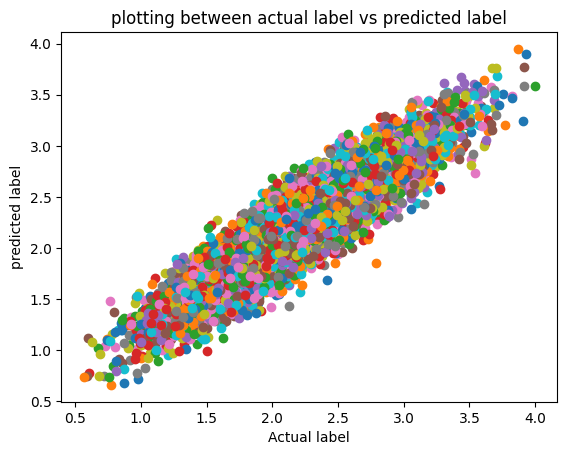

In [15]:
for i in range(10000):
    plt.scatter(y[i], wtx[i])
titletemp="plotting between actual label vs predicted label" 
plt.title(titletemp)
plt.xlabel("Actual label")
plt.ylabel("predicted label")
plt.show

In [ ]:
from numpy import savetxt
# save to csv file
savetxt('wml.csv', w, delimiter=',')

# Question 
>> *1.2 Code the gradient descent algorithm with suitable step size to solve the least squares algorithms and plot ∥wt−wML∥ as a function of t. What do you observe?*

>> For this bit of question it was expected to implement the gradient descent algorithm and plot the normal ecqlidian distance between the current gradient descent weight vector and colsed form solution weight vector.

In [16]:
wgrad = np.zeros((100,1));

>> Randomly initilizing weight vector and printing.

In [17]:
import random
for i in range (100):
  a = random.random()
  wgrad[i]=a;

In [18]:
wgrad.T

array([[0.05276081, 0.70489918, 0.20781561, 0.44586388, 0.32016389,
        0.55895976, 0.8057536 , 0.18779299, 0.62053637, 0.7971405 ,
        0.78916066, 0.4884969 , 0.11612762, 0.68370762, 0.91038639,
        0.18150757, 0.78858126, 0.56851656, 0.84461335, 0.33816873,
        0.05953453, 0.45301815, 0.03671228, 0.91860375, 0.7613994 ,
        0.24400998, 0.39772993, 0.19471314, 0.60417098, 0.82998741,
        0.1087532 , 0.13173912, 0.6332043 , 0.75541066, 0.19388442,
        0.37354185, 0.20263634, 0.33469249, 0.097568  , 0.62928241,
        0.6959278 , 0.80283449, 0.2155295 , 0.78289988, 0.38263311,
        0.05687387, 0.73267796, 0.20451524, 0.28244699, 0.2548516 ,
        0.2479912 , 0.07648245, 0.51979514, 0.1989945 , 0.52383956,
        0.76802941, 0.49273293, 0.18442502, 0.47121737, 0.69065942,
        0.62336978, 0.29876173, 0.9095709 , 0.2219287 , 0.02276949,
        0.57027124, 0.87792928, 0.19182422, 0.09229028, 0.18453169,
        0.02926177, 0.50012756, 0.07639736, 0.88

>> Calculating the weight vector which can be obtained from closed form solution of maximum-likelihood estimator. 

In [19]:
data = x
transdata=np.transpose(data)
mul=np.matmul(transdata, data)
inversemat=np.linalg.inv(mul)
xy=np.matmul(transdata, y)
wml=np.matmul(inversemat, xy)
wml.T

array([[-7.84961009e-03, -1.36715320e-02, -3.61656438e-03,
         2.64909160e-03,  1.88551446e-01,  2.65314657e-03,
         9.46531786e-03,  1.79809481e-01,  3.73757317e-03,
         4.99608944e-01,  8.35836265e-03,  4.29108775e-03,
         1.42141179e-02,  3.94232414e-03,  9.36795890e-03,
        -1.12038274e-03,  3.35727500e-03,  1.16152212e-03,
        -9.40884707e-03, -2.45575476e-03, -1.17409629e-02,
        -1.01960612e-02,  7.95771321e-03, -1.00574854e-02,
         6.04882939e-03, -4.67345192e-03, -3.09091547e-03,
         8.14909193e-03,  1.20264599e-02, -6.82458163e-03,
        -8.65405539e-03,  9.86273479e-04,  4.92968011e-03,
         5.99772461e-03, -1.34667860e-02,  1.07075729e-03,
         1.32745992e-02, -1.14148742e-02, -2.01056697e-02,
         5.85096240e-01,  4.94483247e-04, -7.86666920e-04,
        -2.71926574e-03, -9.54021938e-03, -5.44161058e-03,
         9.80679209e-03, -6.72540624e-03, -4.45414276e-04,
         6.98516508e-03,  3.16138907e-02,  4.51763485e-0

>> calculating and printing the normal euclidean distance between randomly initilized weight vector and closed form solution weight vector.

In [20]:
a1 = np.subtract(wgrad,wml)
c = np.linalg.norm(a1)
c

5.116030436302747

>> Creating a distance vector of 5000 size so to store the euclidean distance of gradient descent weight vector and closed form solutions weight vector.

In [21]:
dist = np.zeros(5000)
dist[0]=c

>> Preforming gradient descent.

In [22]:
term2 = np.matmul(x.T,y)
term2 = np.multiply(term2,2)
print(term2.shape)
term2.T

(100, 1)


array([[22303.87287554, 22002.82269616, 22282.3317395 , 22201.48115247,
        22280.25131959, 22296.50641415, 21790.34236547, 22357.4994951 ,
        22029.38756869, 22956.11050045, 22197.38661341, 22140.06435796,
        22176.11385217, 22050.18638033, 22211.36950573, 22122.96459057,
        22193.54042668, 21812.79820956, 21936.28107942, 22368.12262445,
        22202.32938197, 22130.59610642, 21963.76915422, 22066.2369956 ,
        21959.83581139, 22060.87947002, 22229.16191739, 22223.91570749,
        22183.89465136, 22083.60834209, 22141.84876201, 22348.65614277,
        22253.520241  , 22383.09357132, 22025.74567577, 22260.10217268,
        22064.77930945, 22078.802838  , 22165.93251126, 23277.5200349 ,
        22211.81977024, 22013.15403352, 22110.07827491, 21947.16652315,
        22170.07818926, 22188.1547953 , 22249.59445157, 22006.4820024 ,
        22122.79637858, 22221.5728931 , 22738.34739275, 22277.03240359,
        22258.39733695, 21969.54966989, 22589.84900641, 22057.24

In [23]:
cov

array([[3360.76759145, 2494.81620187, 2538.27646396, ..., 2547.05258557,
        2521.16968965, 2563.99199775],
       [2494.81620187, 3306.39307717, 2507.51217615, ..., 2490.91584082,
        2482.2403131 , 2534.7448421 ],
       [2538.27646396, 2507.51217615, 3371.33523953, ..., 2547.89640887,
        2526.29817797, 2543.64640375],
       ...,
       [2547.05258557, 2490.91584082, 2547.89640887, ..., 3386.93433835,
        2528.20800882, 2580.24365487],
       [2521.16968965, 2482.2403131 , 2526.29817797, ..., 2528.20800882,
        3351.05674894, 2528.53996979],
       [2563.99199775, 2534.7448421 , 2543.64640375, ..., 2580.24365487,
        2528.53996979, 3398.49937121]])

In [24]:
for i in range(5000):
  term1 = np.matmul(cov,wgrad)
  term1 = np.multiply(term1,2)
  grad = np.subtract(term1,term2)
  coeff = np.linalg.norm(grad)
  grad = np.multiply(grad,1/coeff)
  grad = np.multiply(grad,(1/(i+1))) # taking nt as 1/t
  wn = np.subtract(wgrad,grad)
  wgrad = wn
  er = np.subtract(wml,wgrad)
  c = np.linalg.norm(er)
  dist[i] = c

>> Printing distance vector.

In [27]:
dist
#wgrad.shape

array([4.36720728e+00, 4.03351636e+00, 3.83103382e+00, ...,
       1.00030008e-04, 1.00010000e-04, 9.99900000e-05])

In [28]:
iter = np.zeros(5000)
for i in range (5000):
  iter[i] = i+1 

>> Diagram of distance between gradient descent solution and closed form solution with respect to iterations.

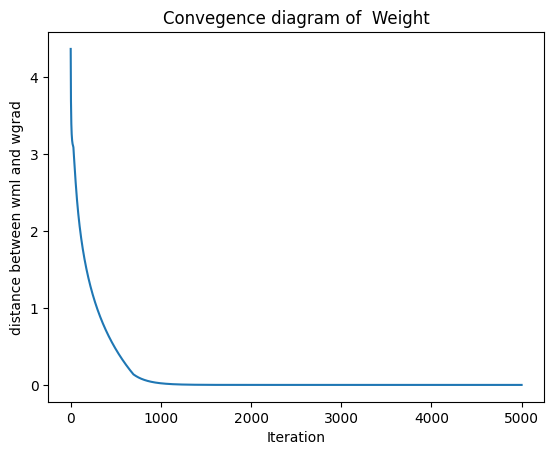

In [29]:
plt.figure(1)
titletemp="Convegence diagram of  Weight"
plt.title(titletemp)
plt.xlabel("Iteration")
plt.ylabel("distance between wml and wgrad")
plt.plot(iter,dist)

# Question
>> *Code the stochastic gradient descent algorithm using batch size of 100 and plot ∥wt − wML∥ as a function of t. What are your observations?*

>> For this bit of question we have to perform the stochastic gradient descent on a batch size of 100 and plot the distance between the colsed form solution and solution from stochastic gradient descent.

In [49]:
def gradientdescent(mul,x_mul_y,W0,eta):
    Wt=W0
    W_ml=W0
    x_mul_y=np.multiply(x_mul_y,2)
    i=1
    while(i<5000):
        t1=np.matmul(mul, Wt)
        t1=np.multiply(t1,2)
        grad = np.subtract(t1, x_mul_y)
        div = np.linalg.norm(grad)
        div=1/div
        grad=np.multiply(grad,div)
        grad=np.multiply(grad,eta)
        W_next=np.subtract(Wt, grad)
        Wt=W_next
        i+=1
    return Wt  

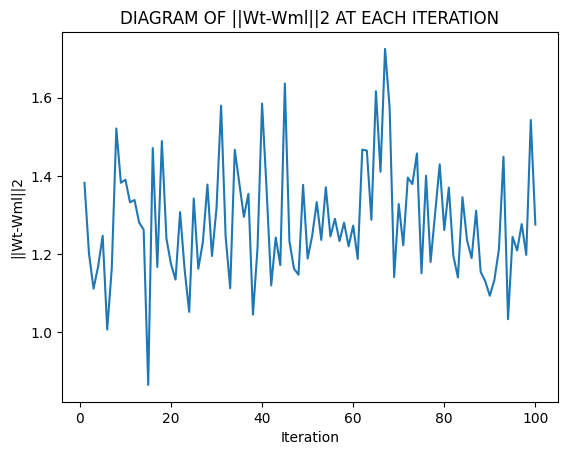

In [50]:
errvec=np.zeros(100)
iteration = np.zeros(100)



w_sto = np.zeros((100,1))
for j in range (100):
  a = random.random()
  w_sto[j] = a


for i in range(100):
    iteration[i]= i+1

    randomlist=[];
    for j in range(100):
        idx = random.randint(0, 9999)
        randomlist.append(idx)
    randomlist=np.array(randomlist)
    x_sto=x[randomlist]
    y_sto=y[randomlist]


    transposedata_sto=np.transpose(x_sto)
    cov_sto=np.matmul(transposedata_sto, x_sto)
    xy_s=np.matmul(transposedata_sto, y_sto)


    

    term2_sto = xy_s
    #term2_sto = np.multiply(term2_sto,2)



    # for j in range(2000):
    #   term1_sto = np.multiply(cov_sto,w_sto)
    #   term1_sto = np.multiply(term1_sto,2)
    #   grad_sto = np.subtract(term1_sto,term2_sto)
    #   coeff_sto = np.linalg.norm(grad_sto)
    #   coeff_sto = 1/coeff_sto
    #   grad_sto = np.multiply(grad_sto,coeff_sto)
    #   grad_sto = np.multiply(grad_sto,0.1)
    #   wn = np.subtract(w_sto,grad_sto)
    #   w_sto = wn

    W0 = w_sto
    Wt=gradientdescent(cov_sto,xy_s,W0,0.1)
    w_sto=Wt
    temp=wml-Wt
    l2n = np.linalg.norm(temp)
    
    # distance_vec = wml-w_sto
    # er = np.linalg.norm(distance_vec)
    errvec[i] = l2n



plt.figure(1)
titletemp="DIAGRAM OF ||Wt-Wml||2 AT EACH ITERATION" 
plt.title(titletemp)
plt.xlabel("Iteration")
plt.ylabel("||Wt-Wml||2")
plt.plot(iteration,errvec)